In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

# Male is 1, Female is 0

target = train.Survived
y = target
df = train

df.Sex = df.Sex.eq("male").astype(int)
df.head(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [100]:
# Remove data we don't think is important
df.drop(["PassengerId", "Name", "Cabin", "Ticket"], axis=1, inplace=True)

In [143]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Data Visualisation

<AxesSubplot:title={'center':'CLASS DIVISION'}>

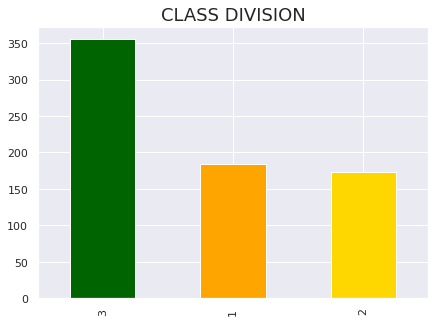

In [459]:
plt.figure(figsize=(7,5))
plt.title("CLASS DIVISION",size=18)
train.Pclass.value_counts().plot.bar(color=['darkgreen','orange','gold'])

Text(0.5, 1.0, 'FARE')

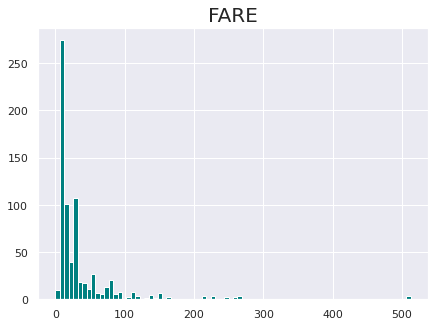

In [460]:
plt.figure(figsize=(7,5))
train['Fare'].hist(bins = 80, color = 'teal')
plt.title("FARE",size=20)

<AxesSubplot:title={'center':'Embarked'}>

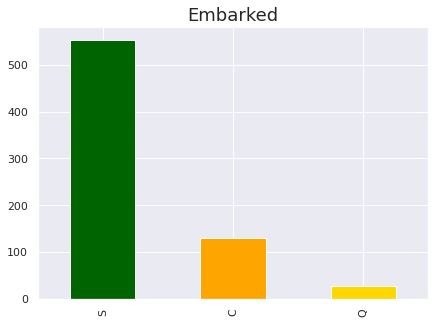

In [461]:
plt.figure(figsize=(7,5))
plt.title("Embarked",size=18)
train.Embarked.value_counts().plot.bar(color=['darkgreen','orange','gold'])

In [ ]:
train.Embarked.value_counts()

## Data Comparison

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='Survived'>

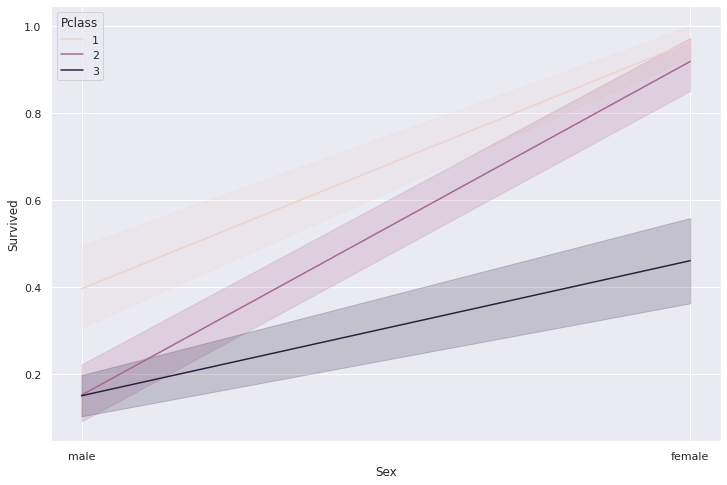

In [449]:
plt.figure(figsize=[12,8])
sns.set_theme(style="darkgrid")
sns.lineplot('Sex','Survived', hue = 'Pclass', data=train)

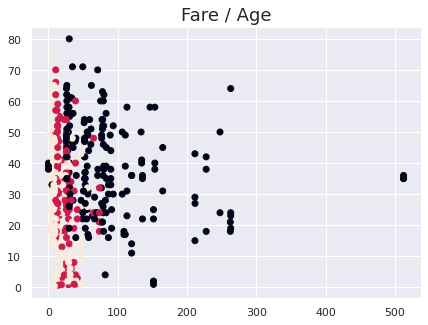

In [493]:
# fare_info = df[["Fare","Pclass", "Age"]]
# import matplotlib.pyplot as plt
# fare_info

# plt.scatter(fares.index, fares.values, c=fares.values)
# plt.hist(fare_info.Fare[fare_info.Fare < 200], bins=20)
# colors = {1:"gold", 2:"green", 3:"brown"}
# high_payers = fare_info[fare_info.Fare > 200]
# color_list = high_payers.replace({"Pclass":colors})
# color_list = list(color_list.Pclass.values)
# color_list
# plt.hist(fare_info.Fare[fare_info.Fare > 200], bins=10)
plt.figure(figsize=(7,5))
plt.title("Fare / Age",size=18)
plt.scatter(fare_info.Fare, fare_info.Age, c=fare_info.Pclass)

In [9]:
cabins = list(train.Cabin)
first_char = []
for cabin in cabins:
    try:
        first_char.append(cabin[0])
    except:
        first_char.append(0)
        
# Maybe do some analysis with just the people who have a recorded cabin
cabin_counts = pd.Series(first_char).value_counts().sort_index

<bound method Series.sort_index of 0    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
dtype: int64>

In [451]:
embarked_info = df[["Embarked","Pclass", "Sex"]]
embarked_info.head()

,Embarked,Pclass,Sex
0,S,3,1
1,C,1,0
2,S,3,0
3,S,1,0
4,S,3,1


In [149]:
train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,0,0.742038
1,1,0.188908


<AxesSubplot:title={'center':'Heatmap'}>

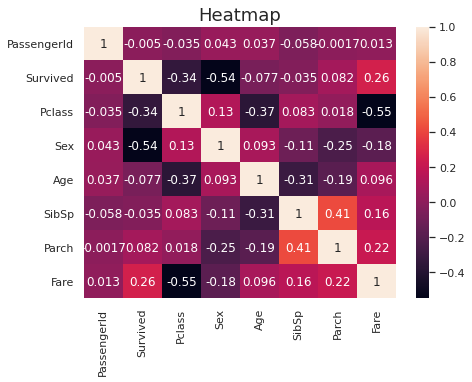

In [464]:
plt.figure(figsize=(7,5))
plt.title("Heatmap",size=18)
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)


In [151]:
train[['Age','Survived']].groupby(['Age'], as_index=False).mean()

,Age,Survived
0,0.42,1.0
1,0.67,1.0
2,0.75,1.0
3,0.83,1.0
4,0.92,1.0
...,...,...
83,70.00,0.0
84,70.50,0.0
85,71.00,0.0
86,74.00,0.0


In [239]:
mw = train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()
mw

,Sex,Survived
0,0,0.754789
1,1,0.205298


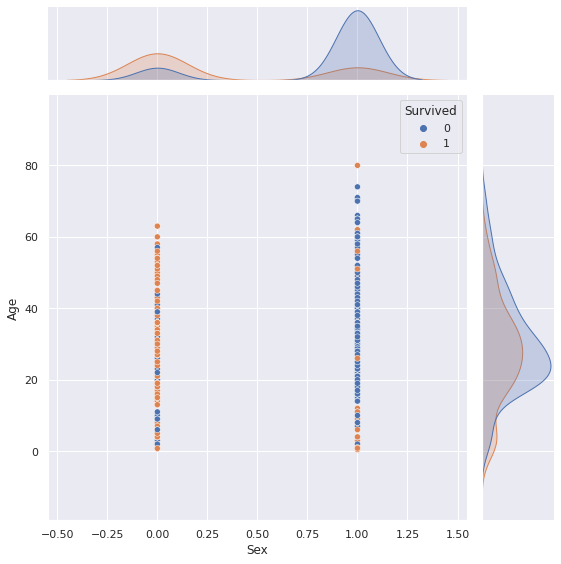

In [275]:
sns.jointplot(data=train, x='Sex',y='Age', hue='Survived', height=8)

In [236]:
train.Sex.value_counts()

1    453
0    261
Name: Sex, dtype: int64

Text(0.5, 1.0, 'SURVIVED AND PCLASS')

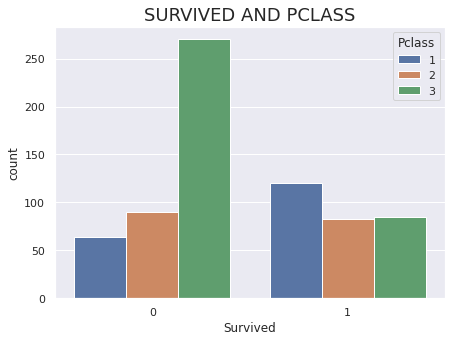

In [474]:
plt.figure(figsize=(7,5))
sns.countplot(x = 'Survived', hue = 'Pclass', data = train)
plt.title("SURVIVED AND PCLASS",size=18)

In [475]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.652174
1,2,0.479769
2,3,0.239437


In [147]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

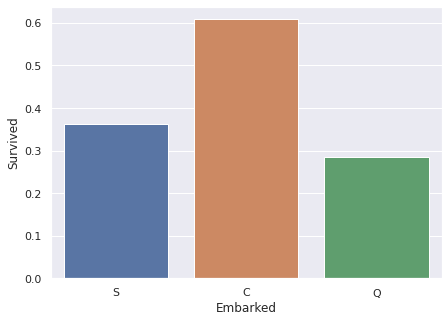

In [469]:
plt.figure(figsize=[7,5])
# sns.set_theme(style="darkgrid")
sns.barplot(x='Embarked',y='Survived', ci=None, data=train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

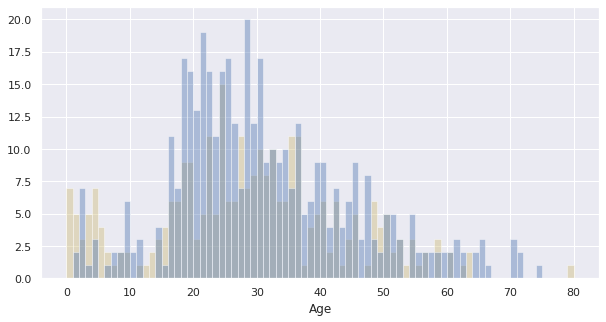

In [479]:
survived_total = train[train['Survived'] == 1]
not_survived_total = train[train['Survived'] == 0]
male_survived = train[(train['Survived'] == 1) & (train['Sex'] == 'male')]
female_survived = train[(train['Survived'] == 1) & (train['Sex'] == 'female')]
male_not_survived = train[(train['Survived'] == 0) & (train['Sex'] == 'male')]
female_not_survived = train[(train['Survived'] == 0) & (train['Sex'] == 'female')]

plt.figure(figsize=[10,5])
plt.subplot(111)
sns.distplot(survived_total['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='y')
sns.distplot(not_survived_total['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='b', axlabel='Age')

## Models & Predictions

In [429]:
# Feature engineerg

#years = X_train.Age.astype(int).value_counts().sort_index()
#plt.scatter(years.index, years.values)
#years
#years = years.transpose()
# baby = 0-4
# child = 5-9
# teen = 10-14
# young_adult = 15-19
# adult = 20-40
# senior = 41+

def bin_ages(X_train):
    X_train["Age"] = X_train["Age"].astype(int)
    X_train["baby"] = X_train["Age"].le(4).astype(int)
    X_train["child"] = X_train["Age"].between(5,9).astype(int)
    X_train["teen"] = X_train["Age"].between(10,14).astype(int)
    X_train["young_adult"] = X_train["Age"].between(15,19).astype(int)
    X_train["adult"] = X_train["Age"].between(20,40).astype(int)
    X_train["senior"] = X_train["Age"].ge(41).astype(int)
    return X_train


def one_hot_embark(X):
    one_hots = pd.get_dummies(X["Embarked"], prefix='Embark')
    X["Embark_C"] = one_hots["Embark_C"]
    X["Embark_Q"] = one_hots["Embark_Q"]
    X["Embark_S"] = one_hots["Embark_S"]
    return X


def one_hot_sex(X):
    dummies = pd.get_dummies(X.Sex)
    X["female"] = dummies["female"]
    X["male"] = dummies["male"]
    return X


def one_hot_class(X):
    class_dummies = pd.get_dummies(X.Pclass)
    X["Upper_class"] = class_dummies[1]
    X["Middle_class"] = class_dummies[2]
    X["Lower_class"] = class_dummies[3]
    return X

### Random Forest

In [494]:
#Random forest modeling

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
 
# Load the data
train = pd.read_csv("train.csv")
# Turn Male/Female into 1/0
#train.Sex = train.Sex.eq("male").astype(int)
# one-hot encode them



# Clean up some incomplete rows
train = train.dropna(subset=["Age"])
train = train.dropna(subset=["Embarked"])

y = train.Survived
X = train.drop(["Survived"], axis=1)
X.index = X.PassengerId


X = one_hot_embark(X)
X = one_hot_sex(X)
X = one_hot_class(X)
X = bin_ages(X)

X = X.drop(["PassengerId", "Name","Age", "Sex","Cabin", "Ticket", "Embarked"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

clf = RandomForestClassifier(criterion="entropy", random_state=0, n_estimators=100)
clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print(f"Random Forest scored: {scores.mean()}")

# from sklearn.model_selection import GridSearchCV
# params = {"n_estimators":[100,200,300], "criterion":("gini", "entropy")}
# grid_clf = GridSearchCV(RandomForestClassifier(), params).fit(X_train, y_train)

# preds = grid_clf.predict(X_test)
# acc = grid_clf.score(X_test, y_test)
# grid_scores = cross_val_score(grid_clf, X_test, y_test)
# print(f"Random Forest scored: {grid_scores.mean()}")

Random Forest scored: 0.7620689655172413


In [499]:
"""
train.csv
from this we make X_train, X_test
Play with the models 
When we are satisfied, run the models on test.csv
"""
#Predicted y DataFram

test = pd.read_csv("test.csv")

test = test.dropna(subset=["Age"])
test = test.dropna(subset=["Embarked"])
test = test.dropna(subset=["Fare"])


Xtest = test

Xtest = bin_ages(Xtest)
Xtest = one_hot_embark(Xtest)
Xtest = one_hot_sex(Xtest)
Xtest = one_hot_class(Xtest)
Xtest = Xtest.drop(["PassengerId", "Name","Age", "Sex","Cabin", "Ticket", "Embarked"], axis=1)

#print(Xtest.isnull().sum())


Random_forest_predict = clf.predict(Xtest)
print(Random_forest_predict)

#push to df

Results = test
Results["Survival prediction"]= Random_forest_predict
Results.to_csv()
Results.head()

[0 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1]


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,senior,Embark_C,Embark_Q,Embark_S,female,male,Upper_class,Middle_class,Lower_class,Survival prediction
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,...,0,0,1,0,0,1,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,...,1,0,0,1,1,0,0,0,1,1
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,...,1,0,1,0,0,1,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,...,0,0,0,1,0,1,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,...,0,0,0,1,1,0,0,0,1,1


### SVM

In [420]:
from sklearn.svm import SVC
clf = SVC().fit(X_train, y_train)
scores = cross_val_score(clf, X_test, y_test)
print(f"A support vector machine scored: {scores.mean()}")

A support vector machine scored: 0.7482758620689655


### Neural Network

In [417]:
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



mlp = MLPClassifier(hidden_layer_sizes = [10,100,10], learning_rate="adaptive", learning_rate_init=0.08)
mlp.fit(X_train,y_train)
scores = cross_val_score(mlp, X_test, y_test)
scores.mean()

print(f"A random neural network from a begginer's tutorial scored: {scores.mean()}")

A random neural network from a begginer's tutorial scored: 0.7620689655172413


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c078c1be-ce4b-4213-a2c3-f117e70673fe' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>